# Search stocks

In [1]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [2]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt



In [3]:
yf.pdr_override()
# no need for requests or BeautifulSoup use read_html
df = pd.read_html('https://de.wikipedia.org/wiki/DAX')[1]
# convert symbol column to list

tickers = df['Symbol'].values.tolist()
#t = [x.replace('.', '-') for x in tickers] 
print(tickers)
df
#yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

['ADS', 'AIR', 'ALV', 'BAS', 'BAYN', 'BEI', 'BMW', 'BNR', 'CON', '1COV', 'DTG', 'DBK', 'DB1', 'DPW', 'DTE', 'EOAN', 'FRE', 'FME', 'HNR1', 'HEI', 'HFG', 'HEN3', 'IFX', 'LIN', 'MBG', 'MRK', 'MTX', 'MUV2', 'PAH3', 'PUM', 'QIA', 'RWE', 'SAP', 'SRT3', 'SIE', 'SHL', 'SY1', 'VOW3', 'VNA', 'ZAL']


,Name,Symbol,Branche,Logo,Indexgewicht in %,(Letzte) Aufnahme,Sitz (Ort),Sitz (Land)
0,Adidas,ADS,Sportartikel,NaN,25.0,22. Juni 1998,Herzogenaurach,Bayern
1,Airbus,AIR,"Luft- und Raumfahrt, Rüstung",NaN,48.0,20. Sep. 2021,Leiden,Niederlande
2,Allianz,ALV,Versicherungen,NaN,68.0,1. Juli 1988,München,Bayern
3,BASF,BAS,Chemie,NaN,38.0,1. Juli 1988,Ludwigshafen am Rhein,Rheinland-Pfalz
4,Bayer,BAYN,Chemie und Pharma,NaN,55.0,1. Juli 1988,Leverkusen,Nordrhein-Westfalen
5,Beiersdorf,BEI,Konsumgüterproduktion,NaN,NaN,20. Juni 2022,Hamburg,Hamburg
6,BMW,BMW,Automobilproduktion,NaN,23.0,1. Juli 1988,München,Bayern
7,Brenntag,BNR,Chemikalienhändler,NaN,9.0,20. Sep. 2021,Essen,Nordrhein-Westfalen
8,Continental,CON,Automobilzulieferer,NaN,7.0,24. Sep. 2012,Hannover,Niedersachsen
9,Covestro,1COV,Chemie,NaN,6.0,19. März 2018,Leverkusen,Nordrhein-Westfalen


In [4]:
ma_count = 21

print(dt.datetime(2021,1,1))
data = pdr.get_data_yahoo(tickers, start=dt.datetime(2021,1,1), end=dt.date.today())['Close']
data.tail()


2021-01-01 00:00:00
[*********************100%***********************]  40 of 40 completed

27 Failed downloads:
- FRE: No data found for this date range, symbol may be delisted
- DPW: No data found, symbol may be delisted
- HFG: No data found for this date range, symbol may be delisted
- PAH3: No data found, symbol may be delisted
- VOW3: No data found, symbol may be delisted
- SIE: No data found for this date range, symbol may be delisted
- MUV2: No data found, symbol may be delisted
- SY1: No data found, symbol may be delisted
- BEI: No data found for this date range, symbol may be delisted
- EOAN: No data found, symbol may be delisted
- BMW: No data found for this date range, symbol may be delisted
- QIA: No data found for this date range, symbol may be delisted
- VNA: No data found for this date range, symbol may be delisted
- BAYN: No data found, symbol may be delisted
- BAS: No data found, symbol may be delisted
- HEN3: No data found, symbol may be delisted
- ADS: No data found,

,1COV,ADS,AIR,ALV,BAS,BAYN,BEI,BMW,BNR,CON,...,QIA,RWE,SAP,SHL,SIE,SRT3,SY1,VNA,VOW3,ZAL
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-05 00:00:00,NaN,NaN,40.669998,71.370003,NaN,NaN,NaN,NaN,2.97,NaN,...,NaN,NaN,89.160004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-06 00:00:00,NaN,NaN,41.080002,71.070000,NaN,NaN,NaN,NaN,3.10,NaN,...,NaN,NaN,89.860001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-07 00:00:00,NaN,NaN,42.070000,75.720001,NaN,NaN,NaN,NaN,3.50,NaN,...,NaN,NaN,90.709999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-08 00:00:00,NaN,NaN,42.250000,76.029999,NaN,NaN,NaN,NaN,3.60,NaN,...,NaN,NaN,90.589996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-11 00:00:00,NaN,NaN,41.320000,73.839996,NaN,NaN,NaN,NaN,3.09,NaN,...,NaN,NaN,88.320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)
#ma_pers.iloc[[-1]]
ma_pers_r=ma_pers.iloc[::-1]
d = {}
df_prep = []
for col_name in ma_pers_r.columns:
    d[col_name]=0
    ma_last = None
    for index, row in ma_pers_r.iterrows():
        if row[col_name] > 0:
            d[col_name] += 1
            if ma_last == None:
                ma_last=row[col_name]
        else:
            if d[col_name] != 0:
               df_prep.append([col_name, d[col_name], ma_last, ma_count, "daily"]) 
            break
df = DataFrame(df_prep,columns=['name','count', 'ma_diff', 'ma_size', 'ma_type']).sort_values(by=['ma_diff', 'count'], ascending=False)
print(df['count'][df['count'] >= 10].size)
lead_comps_df = df[df['count'] >= 10]
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

2


,name,count,ma_diff,ma_size,ma_type
1,BNR,12,25.004811,21,daily
6,MRK,12,4.811054,21,daily


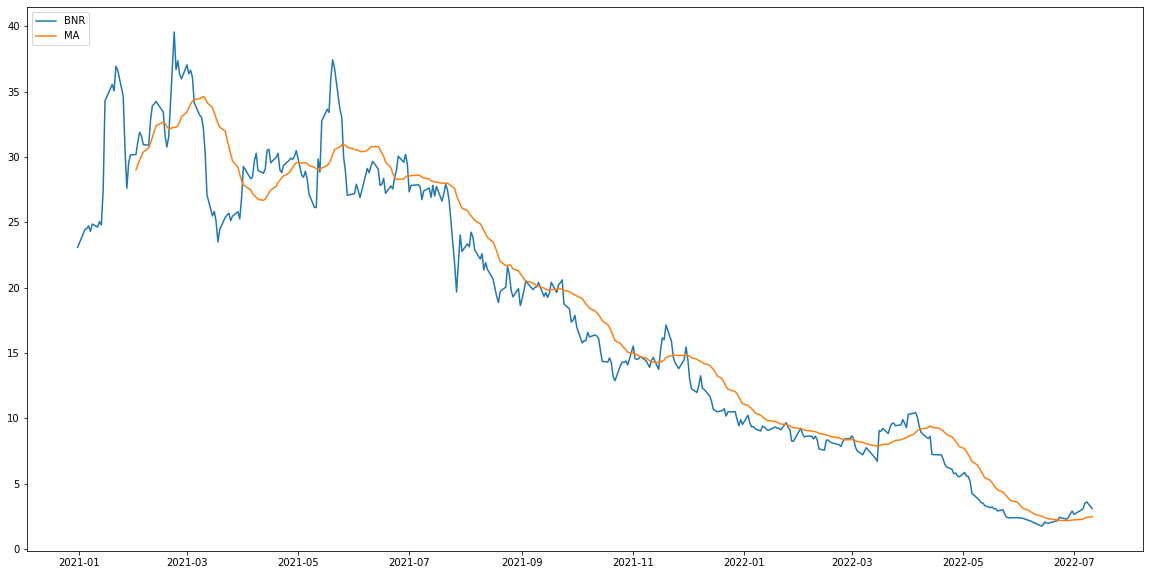

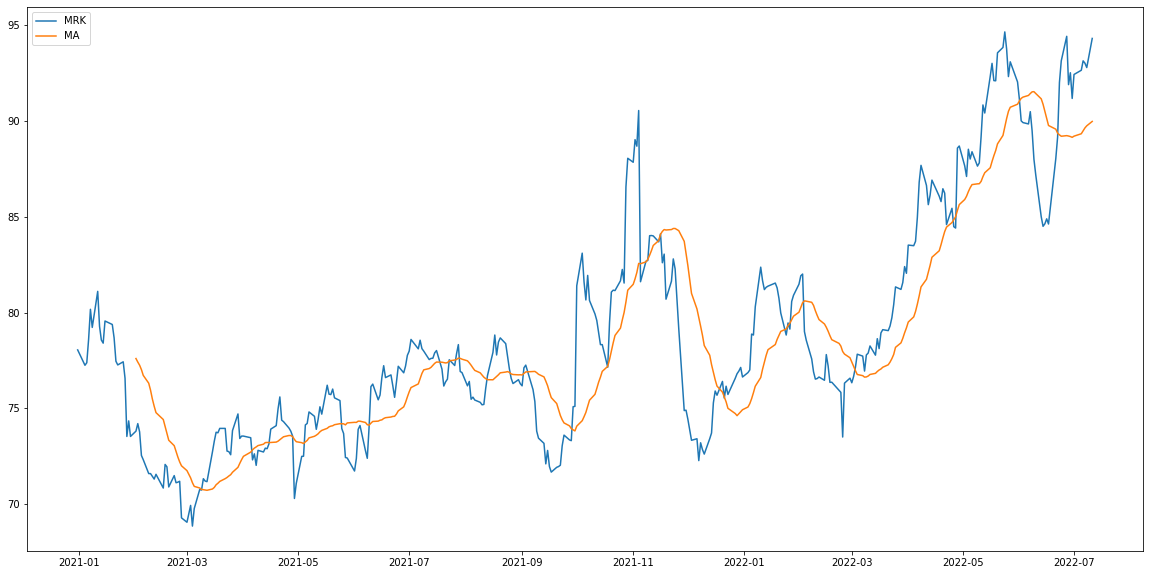

In [6]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote); 
    plt.plot(ma[quote], label = 'MA');
    plt.legend(loc=2);